# PROBLEM STATEMENT
## To classify / predict whether a patient is prone to heart failure depending on multiple attributes.


## IMPORTING THE DATASET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import sklearn
import sys
warnings.filterwarnings(action="ignore")
import numpy as np
import pickle
df=pd.read_csv('framingham.csv')

In [2]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("sklearn",sklearn.__version__)
print("python", sys.version) 


numpy 1.26.4
pandas 2.2.2
sklearn 1.5.1
python 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


In [3]:
df


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [4]:
df.shape

(4238, 16)

## PERFORMING DATA PREPROCESSING

In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
# HERE WE HAVE USED DROPNA FUCNTION TO HANDLE THE NULL VALUES
df.dropna(inplace= True)

In [7]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024387,0.017677,0.206778,0.331243,-0.052128,-0.002308,0.000806,0.013833,-0.070229,-0.045484,0.051575,0.072867,-0.114923,0.003048,0.091745
age,-0.024387,1.000000,-0.158961,-0.210862,-0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,-0.002685,0.118245,0.233810
education,0.017677,-0.158961,1.000000,0.025253,0.013527,-0.013647,-0.030353,-0.079100,-0.039547,-0.012956,-0.124511,-0.058502,-0.137280,-0.064254,-0.031874,-0.063068
currentSmoker,0.206778,-0.210862,0.025253,1.000000,0.773819,-0.051936,-0.038159,-0.107561,-0.041859,-0.051119,-0.134371,-0.115748,-0.159574,0.050452,-0.053346,0.019176
cigsPerDay,0.331243,-0.189099,0.013527,0.773819,1.000000,-0.046479,-0.036283,-0.069890,-0.036934,-0.030222,-0.094764,-0.056650,-0.086888,0.063549,-0.053803,0.052159
BPMeds,-0.052128,0.134670,-0.013647,-0.051936,-0.046479,1.000000,0.113119,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210,0.089116
prevalentStroke,-0.002308,0.050864,-0.030353,-0.038159,-0.036283,0.113119,1.000000,0.066098,0.009619,0.012697,0.061080,0.055878,0.036478,-0.017020,0.016051,0.048351
prevalentHyp,0.000806,0.306693,-0.079100,-0.107561,-0.069890,0.263047,0.066098,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129,0.181556
diabetes,0.013833,0.109027,-0.039547,-0.041859,-0.036934,0.049051,0.009619,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817,0.093397
totChol,-0.070229,0.267764,-0.012956,-0.051119,-0.030222,0.094011,0.012697,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749,0.091127


## DATA VISUALIZATION AND EXPLORATION

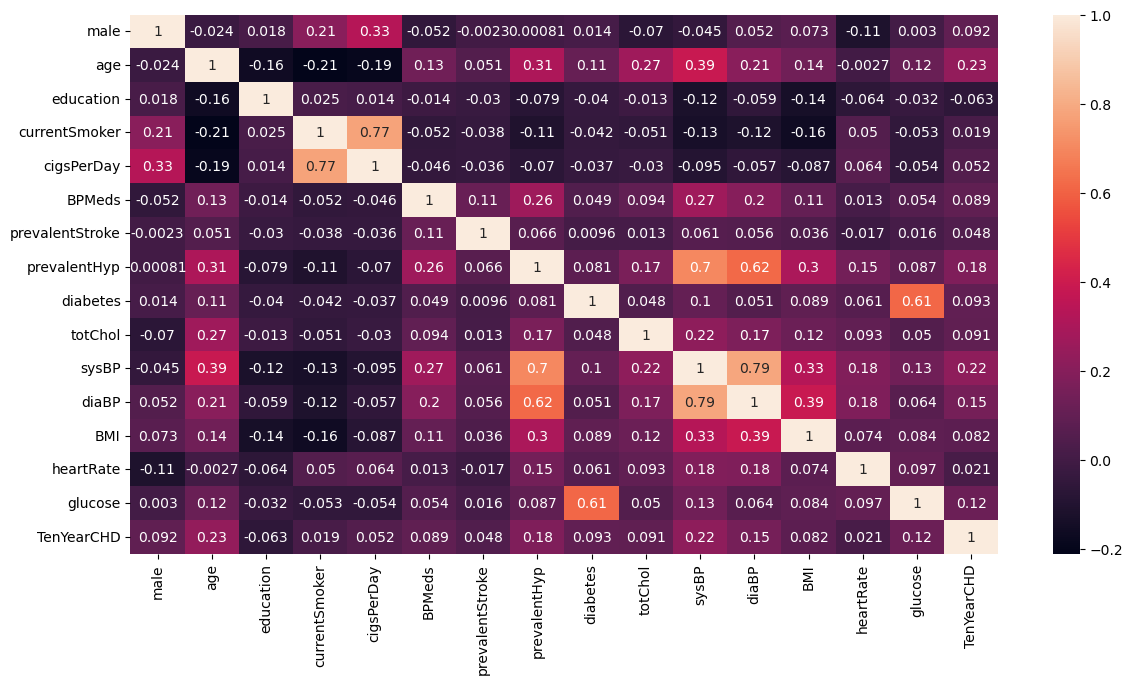

In [10]:
plt.rcParams['figure.figsize'] = [14,7]
sns.heatmap(df.corr(), annot=True)
plt.show()

### The heatmap suggests that blood pressure, smoking habits, and age are significant factors in determining an individual's health risks, particularly related to hypertension and coronary heart disease.
### Some variables, such as education and heart rate, do not show strong correlations with other health-related features in this dataset.
### cigsPerDay and currentSmoker have a very high positive correlation (0.77), indicating that people who smoke more cigarettes per day are more likely to be current smokers.
### sysBP and diaBP are strongly correlated (0.79), reflecting that individuals with higher systolic blood pressure often have higher diastolic blood pressure as well.
### prevalentHyp and sysBP (0.70) and prevalentHyp and diaBP (0.62) show a strong correlation, suggesting that individuals with prevalent hypertension tend to have higher systolic and diastolic blood pressure.

<Axes: xlabel='count', ylabel='TenYearCHD'>

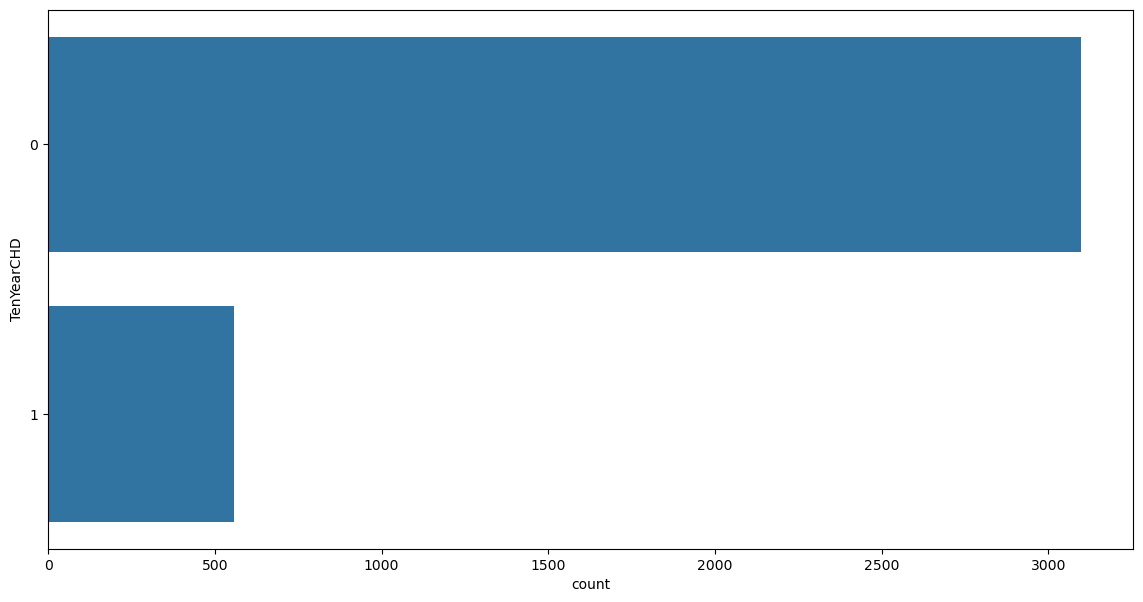

In [11]:
sns.countplot(y=df.TenYearCHD)

### This bar chart shows that the majority of individuals (around 3,000) did not develop coronary heart disease (CHD) within ten years, while a smaller group (around 500) did. This indicates a lower prevalence of CHD in the population within the observed period.

In [12]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


## SPLITTING OF DATASET

In [13]:
#preparing data
# X is the independent variable
# Y is the dependent variable
df.rename(columns={'TenYearCHD': 'target','male':'sex'}, inplace=True)

features = ['age', 'sex', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
X = df[features]
Y = df['target']
Y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: target, Length: 3656, dtype: int64

In [14]:
df.shape

(3656, 16)

## IMPLEMENTING SCALING ON THE DATASET

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)

(2559, 8)
(1097, 8)


In [17]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

## IMPLEMENTING RANDOM FOREST FOR DATASET

In [18]:
from sklearn.ensemble import RandomForestClassifier
md = RandomForestClassifier(n_estimators=250, random_state=42)
md.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=250, random_state=42)

In [19]:
print(md.score(X_test,Y_test))
y_pred=md.predict(X_test)



0.8359161349134002


## EVALUATIING RANDOM FOREST PERFORMANCE

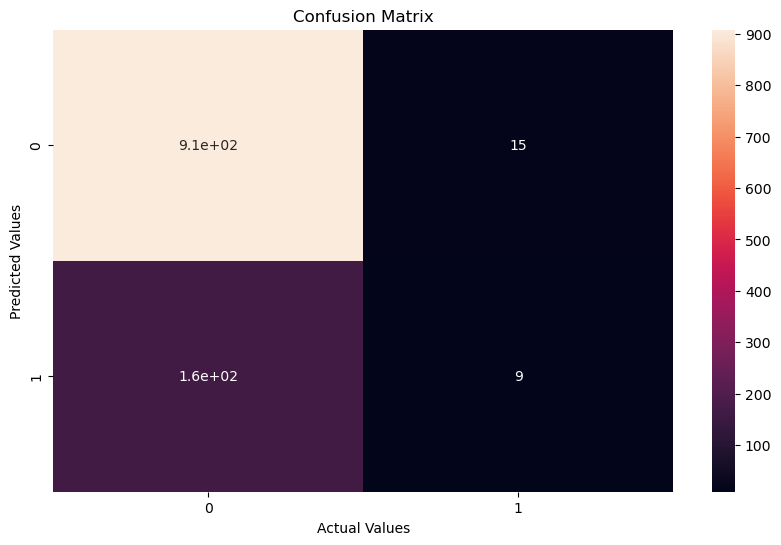

In [20]:

# Evaluating the Classification model model
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()

In [21]:
    with open("heart_model.pkl", "wb") as f:
        pickle.dump(md, f)